<a href="https://colab.research.google.com/github/otopiachka/markdown-doc/blob/master/Seminar_1_light_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Семинар 1

**Нейронные сети и Keras: быстрый старт.**

[Кишкун Анастасия](https://kichkun.github.io/)
[Аленичева Алиса](https://korney3.github.io/)

Skoltech

## **Глубокое машинное обучение**

<img src="https://evilinside.ru/wp-content/uploads/2018/12/mashinnoe-obuchenie-dlya-lyudej-razbiraemsya-prostymi-slovami-5c129b36b6ca3.jpg" width="500">


## 1) Что такое нейросеть?

Концепции нейрона, полносвязного слоя, глубокого обучения
Простейшая нейросеть состоит из **нейронов** - вычислительных узлов. 

<img src="https://evilinside.ru/wp-content/uploads/2018/12/mashinnoe-obuchenie-dlya-lyudej-razbiraemsya-prostymi-slovami-5c129b5d73101.jpg" width="400">

 











### Dense Layer (Полносвязный слой)




Нейроны объеденяются в слои. Из рассмотренной выше модели нейронов получаются **dense** (полносвязные) слои нейронов: все элементы входных данных связаны с каждым нейроном.

Слои нейронов между входными и выходными данными называются **hidden** (скрытыми) слоями. Чем больше слоев, тем **глубже** нейросеть.



<img src="https://neurohive.io/wp-content/uploads/2018/07/neuronnaya-set.gif" width="500">


### Глубокое обучение










Совместное обучение большого числа различных слоев нейросети.

*   Нейросеть можно строить из множества "блоков" (слоев), как конструктор
*   Каждый блок может обладать своей архитектурой, независимо вычисляя выходные данные и градиенты.

<table>
<tr>
<td><img src="https://spectrum.ieee.org/image/MjkxMjcwNg.octet-stream" width="400"></td>
<td><img src="https://img.icons8.com/plasticine/2x/arrow.png" width="200"></td>
<td><img src="https://pics.livejournal.com/xotab_81/pic/001zc7aq" width="500"></td>
</tr>


## 2) Библиотека Keras

Основные возможности

<img src="https://keras.io/img/keras-logo-small-wb.png" width="300">

* Библиотека для машинного обучения (прежде всего, для обучения нейронных сетей)

* **Keras**  - удобный "пользовательский интерфейс" для более низкоуровневых библиотек (например, TensorFlow) 

* Основные принципы: 
    1. Удобство использования
    2. Модульность
    3. Масштабируемость
    4. Работа с Python
    
Инструмент с низким порогом входа, подходящий как продвинутым исследователям, так и любителям.

**keras** - одна из самых популярных библиотек для глубинного обучения 
(надстройка над другими библиотеками).

**keras** использует библиотеку **tensorflow** от Google, которая позволяет строить нейронные сети с высокой эффективностью и скоростью.
Именно поэтому сейчас **tensorflow** - наиболее популярная библиотека для глубинного обучения.

## 3) MNIST

Построение нейронной сети для решения задачи классификации рукописных цифр
![](https://upload.wikimedia.org/wikipedia/commons/2/27/MnistExamples.png)

### Нам нужно распознать рукописные цифры по их изображениям. Так как цифр 10, то в нашей задаче классификации 10 классов. 

Наш набор данных MNIST часто используются для демонстрации возможностей различных алгоритмов машинного и глубинного обучения, так как для него достаточно просто добиться хорошей точности работы.

### Процесс анализа данных:
1. Загрузим данные для обучения и тестирования
2. Предобработаем данные
3. Создадим модель для обучения
4. Обучим модель
5. Протестируем модель
6. Попробуем улучшить модель

### Пререквизиты:
* `!pip install numpy`
* `!pip install pandas`
* `!pip install tensorflow`
* `!pip install keras`

Выполните следующую ячейку, нажав `Shift + Enter`. Менеджер пакетов питона `pip` выполнит установку пакетов `numpy`, `pandas`, `tensorflow` и `keras`

In [1]:
!pip install numpy
!pip install pandas
!pip install tensorflow
!pip install keras

Загрузим необходимые библиотеки: `keras` для работы с нейросетями, `numpy` для научных вычислений, `matplotlib` для построения графиков. 

* Наша нейронная сеть будет делать ряд последовательных преобразований входных данных, поэтому нам нужен тип нейронных сетей Sequential: импортируем его из раздела `keras.models`.

* Типы преобразваний, с которыми мы будем работать: плотный слой Dense, активация Activation, преобразование картинки в длинный вектор Flatten. Каждое преобразование будет отдельным слоем в последовательной модели, поэтому импортируем их из `keras.layers`

Еще мы будем использовать данные MNIST - они тоже лежат прямо в `keras`, как достать этот датасет рассмотрим дальше.

Выполните ячейку ниже:

In [2]:
%tensorflow_version 1.x
# Импортируем сам keras
import keras
# Последовательный тип модели
from keras.models import Sequential
# Импортируем полносвязный слой, слои активации и слой, превращающий картинку в вектор
from keras.layers import Dense, Activation, Flatten
# Импортируем датасеты, чтобы вытащить оттуда нужные нам данные
import keras.datasets
 
import numpy as np
from matplotlib import pyplot as plt
 
# Эти библиотеки отключают лишние предупреждения от библиотек, в частности,
# tensorflow, чтобы не засорять вывод наших результатов
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
from tensorflow.python.util import deprecation
deprecation._PRINT_DEPRECATION_WARNINGS = False
import warnings
warnings.filterwarnings("ignore")
 
# keras является оболочкой для более низкоуровневых библиотек, 
# в нашем случае мы используем tensorflow, у которого на данный момент 
# поддерживаются две версии, установим первую
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

TensorFlow 1.x selected.


Using TensorFlow backend.


Обратим внимание, что вывод ячейки `Using TensorFlow backend.` - это означает, что в качестве бэкэнда используется библиотека для вычисления `tensorflow`.

### Utils

Здесь некоторые дополнительные функции, которые облегчат нам работу с данными (В них разбираться не нужно, только запустить)

In [3]:
#@title
def plot_MNIST_samples_grid(image_data, dataset_name='', N=8):
  """
    Эта функция строит NxN самплов из датасета image_data

    Параметры
    ----------
    image_data : array
        Array of shape 
        (number_of_samples, image_width, image_height, number of channels)
        with images
    dataset_name : str
        Name of dataset to write in the title
    N : int
        Size of grid of samples 
  """
  plt.figure(figsize=(10,10))
  data1=image_data[:N*N]
  
  image_width=image_data.shape[1]
  image_heigth=image_data.shape[2]

  if len(data1.shape)==4:
    image_channels=image_data.shape[3]
    data1 = data1.reshape(N, N,image_width,image_heigth, image_channels)
    data1 = np.transpose(data1,(0,2,1,3,4))
    data1 = data1.reshape(N*image_width,N*image_heigth,image_channels)
    plt.imshow(data1)

  elif len(data1.shape)==3:
    data1 = data1.reshape(N, N,image_width,image_heigth)
    data1 = np.transpose(data1,(0,2,1,3))
    data1 = data1.reshape(N*image_width,N*image_heigth)
    plt.imshow(data1,cmap='gray')
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.title('First '+ str(N*N) + ' '+dataset_name+ ' samples of training set')
  plt.show()

def plot_MNIST_samples(image_data, label_data, classes,  N=8):
  """
    Эта функция строит N самплов каждого класса из датасета image_data

    Параметры
    ----------
    image_data : array
        Array of shape 
        (number_of_samples, image_width, image_height, number of channels)
        with images
    label_data : array
        Array of shape 
        (number_of_samples, )
        with labels
    classes : list
        list with classes names
    dataset_name : str
        Name of dataset to write in the title
    N : int
        Number of samples for each class 
  """
  plt.figure(figsize=(10,N))
  num_classes = len(classes)
  for i, y in enumerate(classes):
      idxs = np.flatnonzero(label_data == y)
      idxs = np.random.choice(idxs, N, replace=False)
      for i, idx in enumerate(idxs):
          plt_idx = i * num_classes + y + 1
          plt.subplot(N, num_classes, plt_idx)
          plt.imshow(image_data[idx], cmap='gray')
          plt.axis('off')
          if i == 0:
              plt.title(str(y))
  plt.show()

from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    Эта функция выводит confusion matrix.
    Нормализация может быть добавлена изменением значения флага 
    `normalize` на `True`
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

def display_errors(errors_index,img_errors,pred_errors, obs_errors):
    """ 
    Эта функция показывает 6 картинок с предсказанными и настоящими классами
    """
    n = 0
    nrows = 2
    ncols = 3
    fig, ax = plt.subplots(nrows,ncols,sharex=True,sharey=True)
    for row in range(nrows):
        for col in range(ncols):
            error = errors_index[n]
            ax[row,col].imshow((img_errors[error]).reshape((28,28)),cmap='gray')
            ax[row,col].set_title("Predicted label :{}\nTrue label :{}".format(pred_errors[error],obs_errors[error]))
            n += 1
    plt.tight_layout()

### 1. Загрузка данных. 

В keras уже есть несколько популярных датасетов, которые можно легко загрузить. Давайте загрузим набор данных MNIST.

In [4]:
# Импортируем модуль датасета MNIST
from keras.datasets import mnist

In [6]:
# Выгрузим тренировочные и тестовые данные при помощи метода load_data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

Посмотрим на содержание датасета, вызвав функцию `plot_MNIST_samples`,
которая строит на одной картинке **N** самплов из массива картинок
**X_train** для каждого класса

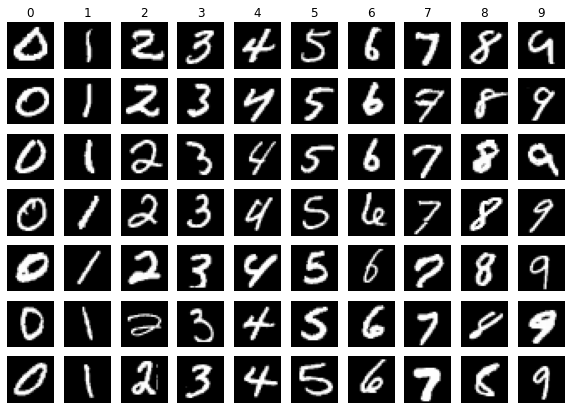

In [7]:
# Создадим лист с именами классов - цифрами от 0 до 9
classes = list(range(0,10))
plot_MNIST_samples(X_train, y_train, classes, N=7)

### 2. Подготовка данных 
**Нормализация значений на [0,1] и перевод целевой переменной в one-hot формат**




Нейронные сети более капризны по сравнению с линейными моделями и моделями на основе решающих деревьев. 

Поэтому им нужна предварительная нормализация данных: чтобы значения всех входных признаков лежали в интервале от $0$ до $1$. 

При этом каждый пиксель картинки представлен в виде целого числа от $0$ до $255$ (для черно-белых картинок) и в виде набора из трех целых чисел от $0$ до $255$ для цветных.

Поэтому нормализацию картинки можно произвести простым делением на $255$.





Еще нейронной сети нужно значение выходной переменной в one-hot формате.

Напомним, что такое **one-hot encoding**. 

Сейчас наша целевая переменная - цифры от $0$ до $9$, то есть $10$ классов. Для каждой картинки наша сеть будет предсказывать вероятность принадлежности к каждому из этих десяти классов. 

Соответственно, истинным значением целевой переменной будет вектор длины $10$, состоящий из $0$ с одной $1$ на месте номера класса, к которому принадлежит картинка (то есть вероятность $1$, что цифра на самом деле принадлежит к конкретному классу).

<img src="https://fsd.multiurok.ru/viewImage.php?image=http://piximus.net/media/19285/words-that-are-short-for-something-12.jpg" width="300">

Это делаем функцией из `keras` `keras.utils.to_categorical`, которая принимает на вход исходный вектор значений выходной переменной и число классов.

In [8]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [9]:
X_train = X_train / 255 
X_test = X_test / 255

y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [10]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [11]:
y_test

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

Посмотрим на то, в каком виде у нас хранятся входные признаки, напечатав размер первого объекта из обучающей выборки (метод **shape**)

Для данных MNIST это изображения 28 на 28.

In [12]:
input_size = X_train[0].shape
input_size

(28, 28)

In [13]:
X_train.shape

(60000, 28, 28)

### 3. Создание модели для обучения

Sequential здесь означает последовательный тип модели, в который мы добавляем слои друг за другом. Инициализируем модель:

In [17]:
# Создаем пустую модель
model = Sequential()

#### Добавляем в модель слой за слоем. 

<img src="https://ml4a.github.io/images/figures/mnist_2layers.png" width="600">


* сначала растягиваем картинку в длинный вектор слоем `Flatten`
* потом идет полносвязный слой - нейроны в следующем слое зависят от всех переменных в предыдущем
* далее используем функцию активации `ReLU`
* потом идет следующий полносвязный слой. В нем $10$ выходов - по числу классов
* в конце используем функцию активации `SoftMax`

**ReLU** - стандартный выбор для функции активации нейронов внутри нейросети. Несмотря на простоту функции, эксперименты показывают, что эта функция активации достаточна для эффективного обучения нейросетей.

**Softmax** - функция активации для выходного слоя нейронов в задачах классификации с числом классов $>2$. Она переводит выходные значения сети в вероятности принадлежности конкретного элемента выборки к одному из класов.

*Важно: в первом слое `Sequential` модели keras необходимо указать размерность входных данных $28*28=784$ , перед активацией делаем плотный слой с размерностью $10$ по числу классов*




In [18]:
# Этот слой превратит нашу двумерную картинку в вектор
model.add(Flatten(input_shape=input_size))

# Добавляем скрытый полносвязный слой из 128 нейронов
model.add(Dense(units=128, input_shape=input_size))
#И активацию для скрытого слоя нейронов
model.add(Activation('relu'))

# Добавляем выходной полносвязный слой из 10 нейронов
model.add(Dense(units=10))
# Чтобы получить на выходе вероятности для каждого класса, выбираем активацию
# softmax
model.add(Activation('softmax'))

После описания архитектуры необходимо скомпилировать модель при помощи метода `compile`, указав минимизируемую функцию потерь (параметр `loss`), 
оптимизатор (параметр `optimizer`, который позаботится об изменении весов модели) и метрику (параметр `metrics`), по которой будет оцениваться точность работы на тестовой выборке в процессе обучения

In [19]:
# Компилируем модель с функцией ошибки categorical entropy, оптимизатором Адам 
# (оптимизатор, который со стандартным набором параметров может обучить эффективную
#  нейросеть), и метрикой - количеством правильно угаданных цифр.
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

Еще можно посмотреть на нашу модель в целом: сколько в ней слоев, сколько параметров у каждого слоя с помощью команды model.summary()

In [20]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               100480    
_________________________________________________________________
activation_3 (Activation)    (None, 128)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
_________________________________________________________________
activation_4 (Activation)    (None, 10)                0         
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


### Обучение нейросети

**Обучение** нейросети - изменение **весов** нейронов при помощи метода обратного распространения ошибки

### 4. Обучение модели
**Тренировка с указанием данных, числа эпох и размера подвыборки** 

Теперь задана структура модели и то, как мы будем ее обучать.
Обучаем ее аналогично `sklearn` - с помощью метода `fit`.

После запуска `fit` параметры оптимизируются градиентым спуском.
На каждом шаге градиентного спуска мы используем функцию потерь, которая подсчитана только по части полной выборки.

Два дополнительных параметра для обучения:
* **batch_size** - размер подвыборки, которая используется для одного шага оптимизации = 40 
* **epochs** - число эпох - сколько раз мы проходим полностью по всей выборке

[Эксперименты](https://arxiv.org/abs/1609.04836) показывают, что выбор **batch_size** в диапазоне $32-512$ в среднем обеспечивает нормальную обобщающую способность нейросети, то есть помогает модели делать лучшие предсказания на новых данных, не присутствующих в тренировочной выборке. 

Количество эпох **epochs** обычно выбирают так, чтобы метрика качества на валидационной выборке не стала убывать (то есть, не произошло переобучения). 

В целом, подбор подобных макропараметров сети является отдельным классом задач, поскольку одна и та же архитектура нейросети может значительно улучшать/ухудшать результаты предсказаний в зависимости от выбранных значений.

In [21]:
model.fit(X_train, y_train, epochs=5, batch_size=40)


Epoch 1/5
60000/60000 [==============================] - 6s 98us/step - loss: 0.2754 - accuracy: 0.9227
Epoch 2/5
60000/60000 [==============================] - 4s 71us/step - loss: 0.1228 - accuracy: 0.9639
Epoch 3/5
60000/60000 [==============================] - 4s 70us/step - loss: 0.0846 - accuracy: 0.9750
Epoch 4/5
60000/60000 [==============================] - 4s 70us/step - loss: 0.0626 - accuracy: 0.9815
Epoch 5/5
60000/60000 [==============================] - 4s 70us/step - loss: 0.0497 - accuracy: 0.9851


### 5. Валидация качества модели на тестовых данных.
Протестируем модель на тестовой выборке для этого используется метод `evaluate`.
Выводится **loss** и **точность**.

In [22]:
model.evaluate(X_test, y_test)

10000/10000 [==============================] - 1s 55us/step


[0.07914449009178207, 0.9761999845504761]

Что это означает: для нашей модели на основе нейронной сети мы получаем точность 98% - то есть, с вероятностью 98% модель определяет, какая цифра нарисована на картинке

## 4) Сверточные нейросети

Слой сверточной сети состоит из **ядра** - окна с весами, которое последовательно проходит по пикселям входящего изображения (на картинке движется ядро размером $3\text{x}3$) и складывает их с соответствующими весами.

<table>
<tr>
<td>
<img src="https://neurohive.io/wp-content/uploads/2018/07/convolutional-neural-network.gif" width="500">
</td>
</tr>
<tr>
<td>
<img src="https://neurohive.io/wp-content/uploads/2018/07/2d-covolutions.gif" width="500">
</td>
</tr>
</table>


<img src="https://i.stack.imgur.com/YDusp.png" width="700">



Таким образом, использование сверток помогает извлекать паттерны на картинке.

Чем глубже сверточный слой, тем более сложные паттерны он способен распознавать:

![](https://raw.githubusercontent.com/MerkulovDaniil/TensorFlow_and_Keras_crash_course/master/rus/2_Deep%20Learning%20and%20Keras/features.png)

#### MaxPool

Слой, похожий на свертку, но вместо суммирования элементов входного изображения с весами ядра, этот слой внутри перемещающегося окна выбирает максимальный элемент и передает его дальше.

Обычно слои **Conv** и **MaxPool** используют в паре, **MaxPool** используется для уменьшения размерности данных.

<table>
<tr>
<td>
<img src="https://mlblr.com/images/maxpool.gif" width="400">
</td>
</tr>
<tr>
<td>
<img src="https://algorithmia.com/blog/wp-content/uploads/2018/03/word-image-5.png" width="500">
</td>
</tr>
</table>







### 6. Улучшение модели: добавим сверточный слой и посмотрим на результат.

Теперь вместо того, чтобы превращать нашу картинку в вектор (из-за чего мы теряем много информации о взаимном расположении пикселей) и отправлять на вход `Dense` слоям, сначала мы произведем свертку изображения при помощи `Conv2D`.

Таким образом мы постараемся извлечь основные паттерны цифр, и только потом результат свертки превратим в вектор и передадим его полносвязной части нейросети.

Добавим явно число каналов(слоев цвета) в наш датасет - это важно для сверточных слоев. Поскольку наш датасет черно-белый, изображение состоит из одного канала (в отличие от $3$х RGB каналов цветных изображений). 
т.е. делается преобразование ($60000$, $28$, $28$) -> ($60000$, $28$, $28$, $1$). Это не изменяет общие размеры матриц, но `keras` принимает на вход именно такую структуру данных - если мы используем сверточные слои.




In [23]:
X_train, X_test = X_train.reshape((60000, 28, 28, 1)), X_test.reshape((10000, 28, 28, 1))
input_size = X_train[0].shape
print(input_size)

(28, 28, 1)


Мы используем новый тип преобразования в слое - сверточный `Conv2D`

In [24]:
from keras.layers import Conv2D

Создание модели. `Sequential` здесь снова означает последовательный тип модели, в который мы добавляем слои друг за другом

In [25]:
# Задаем пустую модель
conv_model = Sequential()

Здесь мы используем сверточный слой, который обучает $24$ ядра размером $3$x$3$ для поиска 
 конкретных геометрических (настраиваемых в процессе обучения) паттернов на входном изображении.


In [26]:
# В начале добавляем сверточный слой, первый параметр - количество фильров (24),
# второй - размер "ядра" - окошка, перемещающегося по входному изображению (3,3),
# padding - добавление пикселей по краям изображения, чтобы сделать свертку на 
# крайних пикселях, режим `same` - повторение края
conv_model.add(Conv2D(24, (3, 3), padding='same', input_shape=input_size))

# Для сверточного слоя тоже нужна активация и ReLU подходит сюда так же, 
# как и для скрытого полносвязного слоя
conv_model.add(Activation('relu'))

# Разворачиваем результат свертки в вектор
conv_model.add(Flatten())

# Добавляем полносвязный скрытый слой, вид активации можно указать сразу 
# в описании Dense слоя, в данном случае - ReLU
conv_model.add(Dense(64, activation='relu'))

# Для выходного полносвязного слоя указываем количество итоговых классов и 
# softmax для активации
conv_model.add(Dense(10, activation='softmax'))

In [27]:
# При помощи метода `summary` мы можем посмотреть,как выглядит наша 
# итоговая архитектура нейросети и количество параметров (весов)
conv_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 24)        240       
_________________________________________________________________
activation_5 (Activation)    (None, 28, 28, 24)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 18816)             0         
_________________________________________________________________
dense_5 (Dense)              (None, 64)                1204288   
_________________________________________________________________
dense_6 (Dense)              (None, 10)                650       
Total params: 1,205,178
Trainable params: 1,205,178
Non-trainable params: 0
_________________________________________________________________


После описания архитектуры необходимо скомпилировать модель, указав минимизируемую функцию потерь, 
оптимизатор и попросив модель выводить точность работы на тестовой выорке в процессе обучения


In [28]:
# Компилируем модель с функцией ошибки categorical entropy, оптимизатором Адам 
# (оптимизатор, который со стандартным набором параметров может обучить эффективную
#  нейросеть), и метрикой - количеством правильно угаданных цифр.
conv_model.compile(loss='categorical_crossentropy',
                   optimizer='adam',
                   metrics=['accuracy'])

Тренировка с указанием данных, числа эпох и размера подвыборки

In [29]:
conv_model.fit(X_train, y_train, epochs=5, batch_size=32)

Epoch 1/5
60000/60000 [==============================] - 12s 205us/step - loss: 0.1554 - accuracy: 0.9541
Epoch 2/5
60000/60000 [==============================] - 7s 117us/step - loss: 0.0516 - accuracy: 0.9846
Epoch 3/5
60000/60000 [==============================] - 7s 117us/step - loss: 0.0304 - accuracy: 0.9904
Epoch 4/5
60000/60000 [==============================] - 7s 119us/step - loss: 0.0190 - accuracy: 0.9942
Epoch 5/5
60000/60000 [==============================] - 7s 116us/step - loss: 0.0125 - accuracy: 0.9961


Проверим качество работы модели на тестовых данных. Выводится loss и точность.

In [30]:
conv_model.evaluate(X_test, y_test)

10000/10000 [==============================] - 1s 71us/step


[0.07906131976807082, 0.9793999791145325]

#### Получение предсказаний классов на основе выходных данных нейросети

Как мы уже поняли, выходной слой нейросети возвращает нам вектор длиной $10$ (количество классов) с **вероятностями** принадлежности данного объекта каждому классу. Как же нам получить итоговые предсказания, то есть сами **номера классов**? 


Верифицируем, что полученное значение точности модели соответствует точности модели, которую мы получим с помощью обычной кобминации подсчета прогноза и затем вызова функции accuracy_score.

In [32]:
# Импортируем знакомую нам функцию подсчета accuracy
from sklearn.metrics import accuracy_score

# Метод predict модели возвращает выходные значения последнего слоя нейросети 
# То есть y_test_predictions сейчас содержит len(X_test) векторов 
# предсказанных вероятностей
y_test_predictions = conv_model.predict(X_test)

# y_test содержит one-hot формат исходных классов, то есть вероятности 1, стоящие 
# в элементах вектора, отвечающих за правильный номер класса

# Получим предсказанные номера классов, попросив выдать нам номера выходного вектора,
# содержащие самые большие вероятности (то есть тот класс, в котором сеть уверена
#                                       с наибольшей вероятностью)
# Это делается при помощи функции np.argmax. Аргумент axis показывает, 
# что нас интересует поиск максимальных значений не среди всей выборки (axis=0), 
# а среди 10ти классов (axis=1)

y_predicted_classes=np.argmax(y_test_predictions, axis=1)
y_real_classes=np.argmax(y_test, axis=1)

#посчитаем точность наших предсказаний
print(accuracy_score(y_real_classes, y_predicted_classes))

0.9794


## 5) Бонус: Переобучение. Dropout

Иногда нейросеть вместо того, чтобы "понять" общие паттерны данных просто "заучивает" обучающую выборку: на тренировочной части датасета модель правильно угадывает принадлежность к классу, а на валидационном датасете результативность в разы снижается.



Такая ситуация называется **переобучением** (overfitting).

<img src="https://miro.medium.com/max/900/1*xoXxugPVIeZImf5NVfIwAQ.jpeg" width="500">




**Dropout** - техника спасения нейросетей от переобучения, при которой в процессе тренировки случайно "выключаются" некоторые нейроны из моделей.

Альтернативный взгляд - вместо тренировки одной большой сети проходит одновременная тренировка нескольких подсетей меньшего размера, результаты которых потом усредняются (в каком то смысле, сглаживаются).

![](https://github.com/MerkulovDaniil/TensorFlow_and_Keras_crash_course/blob/master/rus/2_Deep%20Learning%20and%20Keras/dropout.gif?raw=true)

Давайте попробуем посмотреть, как написать сеть, состоящую из нескольких сверточных слоев с использованием `dropout` на `keras`

### 7. Модель из нескольких сверточных слоев с дропаутами

In [33]:
from keras.layers import Conv2D, MaxPooling2D, Dropout


# Все так же, создаем модель
cnn = Sequential()

# Начинаем со сверточного слоя, указывая тип активации на выходе из него и способ заполнения краев (padding)
cnn.add(Conv2D(64, (3, 3), input_shape=input_size, activation='selu', padding='same'))


# Слой dropout, который на каждом шаге "выключает" 25% случайно выбранных нейронов
cnn.add(Dropout(0.25))

# Еще сверточный слой
cnn.add(Conv2D(32, (3, 3), activation='selu', padding='same'))
# Здесь мы используем метод MaxPooling, который уменьшает размер обрабатываемого изображения, 
# выбирая из 4 пикселей 1 с максимальным значением, чтобы это быстрее считалось. (2,2) -> 1
cnn.add(MaxPooling2D(pool_size=(2, 2)))

cnn.add(Dropout(0.5))

# Последний слой необходим для классификации, но перед ним необходимо векторизовать данные
cnn.add(Flatten())
cnn.add(Dense(10, activation='softmax'))

# Компилируем модель с функцией ошибки categorical entropy, оптимизатором Адам 
# (оптимизатор, который со стандартным набором параметров может обучить эффективную
#  нейросеть), и метрикой - количеством правильно угаданных цифр.
cnn.compile(loss='categorical_crossentropy',
                  optimizer = 'nadam',
                  metrics = ['accuracy'])

In [34]:
#Посмотрим, из чего у нас состоит итоговая архитектура
cnn.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 28, 28, 64)        640       
_________________________________________________________________
dropout_1 (Dropout)          (None, 28, 28, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 32)        18464     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 10)               

In [35]:
# При помощи fit натренируем 5 эпох нашу модель с размером батча 128
# На выходе мы получим натренированную модель и структуру history_cnn, 
# из которой можно достать значения функции ошибки и метрик качества

history_cnn = cnn.fit(X_train, y_train,
      batch_size=128,
      epochs=5,
      validation_data=(X_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 9s 155us/step - loss: 0.2501 - accuracy: 0.9261 - val_loss: 0.1008 - val_accuracy: 0.9710
Epoch 2/5
60000/60000 [==============================] - 9s 145us/step - loss: 0.1355 - accuracy: 0.9601 - val_loss: 0.0979 - val_accuracy: 0.9712
Epoch 3/5
60000/60000 [==============================] - 9s 145us/step - loss: 0.1204 - accuracy: 0.9653 - val_loss: 0.0833 - val_accuracy: 0.9778
Epoch 4/5
60000/60000 [==============================] - 9s 146us/step - loss: 0.1208 - accuracy: 0.9670 - val_loss: 0.0926 - val_accuracy: 0.9744
Epoch 5/5
60000/60000 [==============================] - 9s 148us/step - loss: 0.1142 - accuracy: 0.9677 - val_loss: 0.0850 - val_accuracy: 0.9762


In [36]:
# history_cnn.history - словарь, содержащий значения функции ошибки и точности 
# на трейновой и тестовой выборках каждую эпоху
history_cnn.history.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

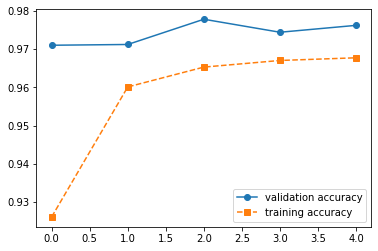

In [37]:
# Построим графики точности на валидационной (val_acc) и трейновой (acc) выборках
# в конце каждой эпохи обучения

plt.plot(history_cnn.history['val_accuracy'], '-o', label='validation accuracy')
plt.plot(history_cnn.history['accuracy'], '--s', label='training accuracy')
plt.legend();

In [38]:
# Выведем метрики качества нашей нейросети (функцию ошибки и точность)
# для тестовой выборки
cnn.evaluate(X_test, y_test)

10000/10000 [==============================] - 1s 94us/step


[0.08503092767239431, 0.9761999845504761]

## Выводы





1.   Мы познакомились с **нейросетями** и основными терминами - **нейрон**, **слои**, **функция активации**, **функция ошибки (loss)**, **обучение/тренировка**, **батч**, **эпоха**...

2.   Начали учиться работать с библиотекой для "дрессировки" нейронных сетей **`keras`**

3.   На примере одного из самых популярных датасетов черно-белых картинок **MNIST** посмотрели, как строить нейросети для задачи **классификации**

4.  Узнали разницу между **полносвязными Dense** и **сверточными Conv2D** слоями нейросетей и поняли, что свертки позволяют обучать гораздо более эффективные предсказательные модели на изображениях

5.  Получили представление о **переобучении** нейросетей и узнали один из способов увеличения обобщающей способности модели - **Dropout**

6. Познакомились с новыми слоями нейростей - **Flatten**, превращающим картинку в вектор и  **MaxPooling** - уменьшающим размер изображения после свертки


![Градиентный спуск](https://neurohive.io/wp-content/uploads/2018/11/minimum-funkcii-570x309.png)

## В следующий раз





1.   Датасет цветных фото из $10$ классов - **CIFAR10**

2.   Лечение переобучения при помощи **аугментации данных**

3.  Задача бинарной классификации кошек и собак

4.  Увеличение предсказательной способности модели через **transfer learning**

5. \+ Бонус для самых любопытных - **сегментация** :^)